# Data Import and Basic Exploaration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
app = pd.read_csv("archive/application_data.csv")
prev_app = pd.read_csv("archive/previous_application.csv")

In [3]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [4]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
app.shape

(307511, 122)

In [6]:
msng_info = pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
msng_info.rename(columns={'index':'col_name',0:'null_count'}, inplace=True)
msng_info.head()

,col_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0


In [7]:
# missing value percentage
msng_info['msng_pct'] = msng_info['null_count']/app.shape[0] * 100
msng_info.to_excel("archive/missing_info.xlsx", index=False)

In [8]:
msng_info.head(10)

,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0
5,REG_CITY_NOT_WORK_CITY,0,0.0
6,LIVE_CITY_NOT_WORK_CITY,0,0.0
7,ORGANIZATION_TYPE,0,0.0
8,FLAG_DOCUMENT_21,0,0.0
9,FLAG_DOCUMENT_20,0,0.0


In [9]:
msng_col = msng_info[msng_info['msng_pct']>=40]['col_name'].to_list()

# app with columns with 40 and higher missing data removed
new_app = app.drop(labels=msng_col, axis=1)
new_app.shape

(307511, 73)

In [10]:
new_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
flag_col = []

for col in new_app.columns:
    if col.startswith("FLAG_"):
        flag_col.append(col)
        
len(flag_col)

28

In [12]:
# flag + target columns
flag_tgt_col = new_app[flag_col+["TARGET"]].head()
flag_tgt_col.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


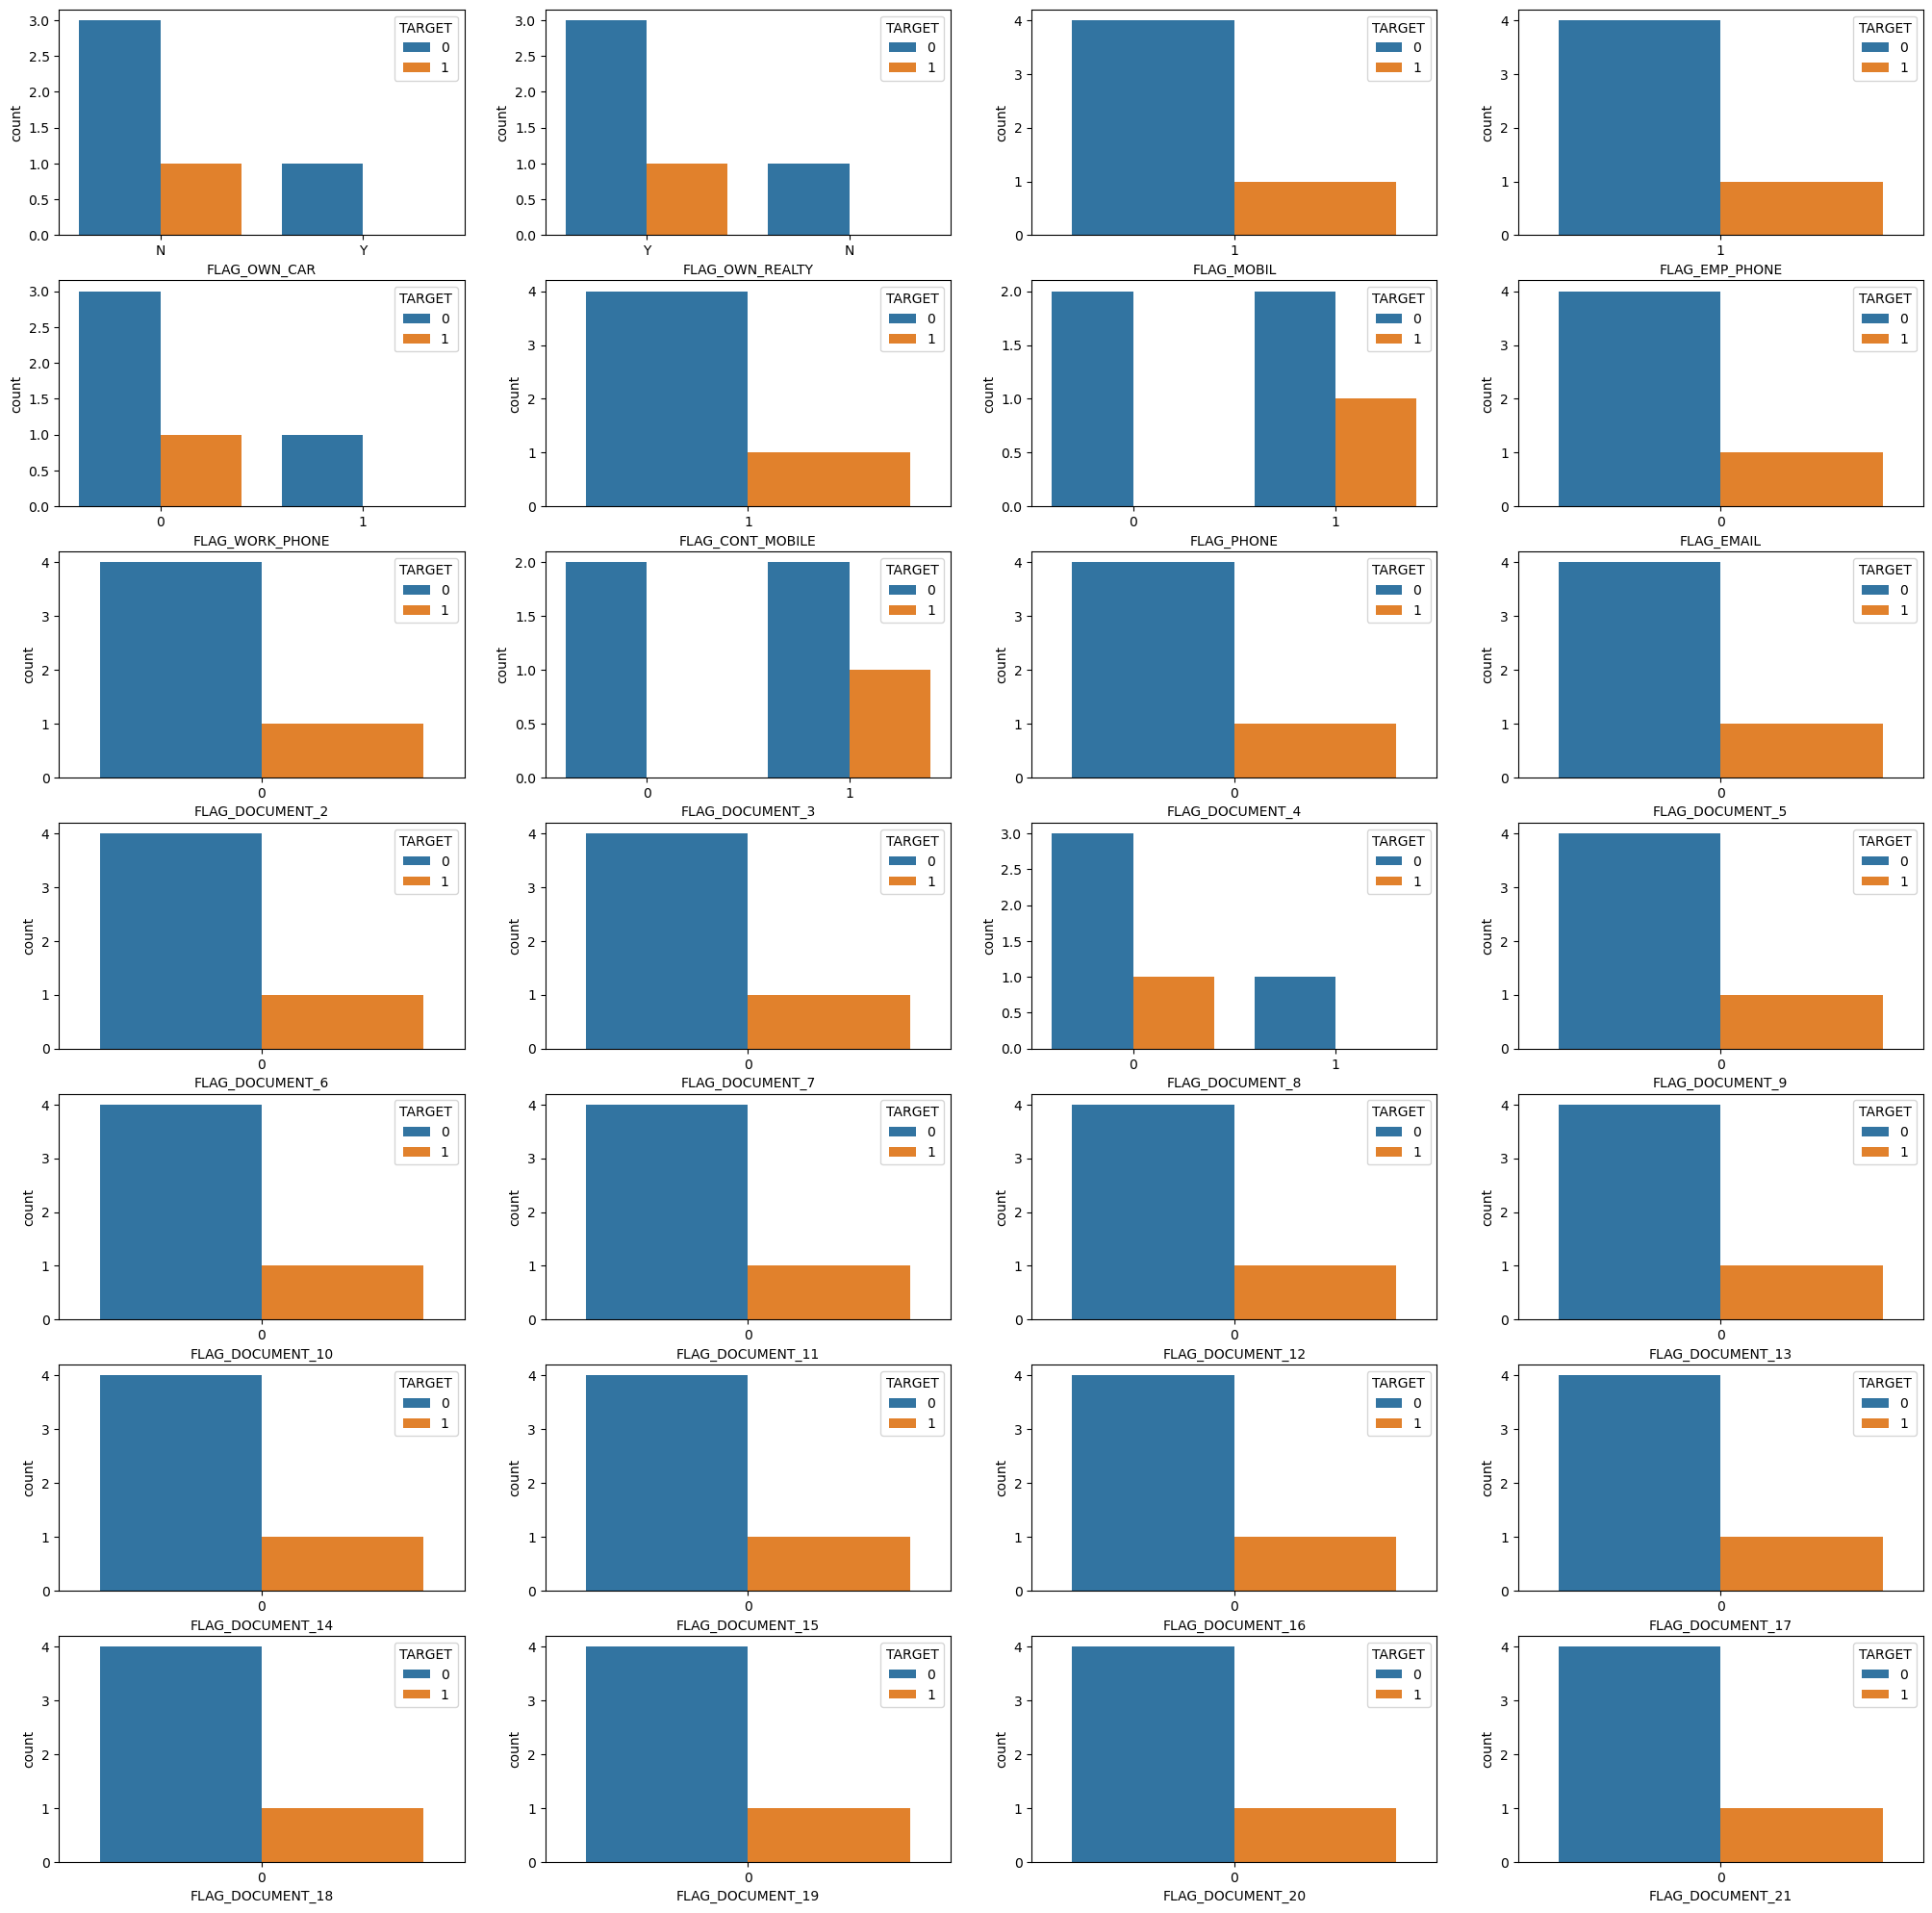

In [13]:
plt.figure(figsize=(25,25))
for i, col in enumerate(flag_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_tgt_col, x=col, hue='TARGET')

In [14]:
flag_corr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE',
     'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
flag_corr_df = new_app[flag_corr]

In [15]:
flag_corr_df['FLAG_OWN_CAR'] =  flag_corr_df['FLAG_OWN_CAR'].replace({'N':0, 'Y':1})
flag_corr_df['FLAG_OWN_REALTY'] =  flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0, 'Y':1})
flag_corr_df.groupby(['FLAG_OWN_REALTY']).size()

C:\Users\moham\AppData\Local\Temp\ipykernel_20360\495723121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_CAR'] =  flag_corr_df['FLAG_OWN_CAR'].replace({'N':0, 'Y':1})
C:\Users\moham\AppData\Local\Temp\ipykernel_20360\495723121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_REALTY'] =  flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0, 'Y':1})


FLAG_OWN_REALTY
0     94199
1    213312
dtype: int64

<AxesSubplot: >

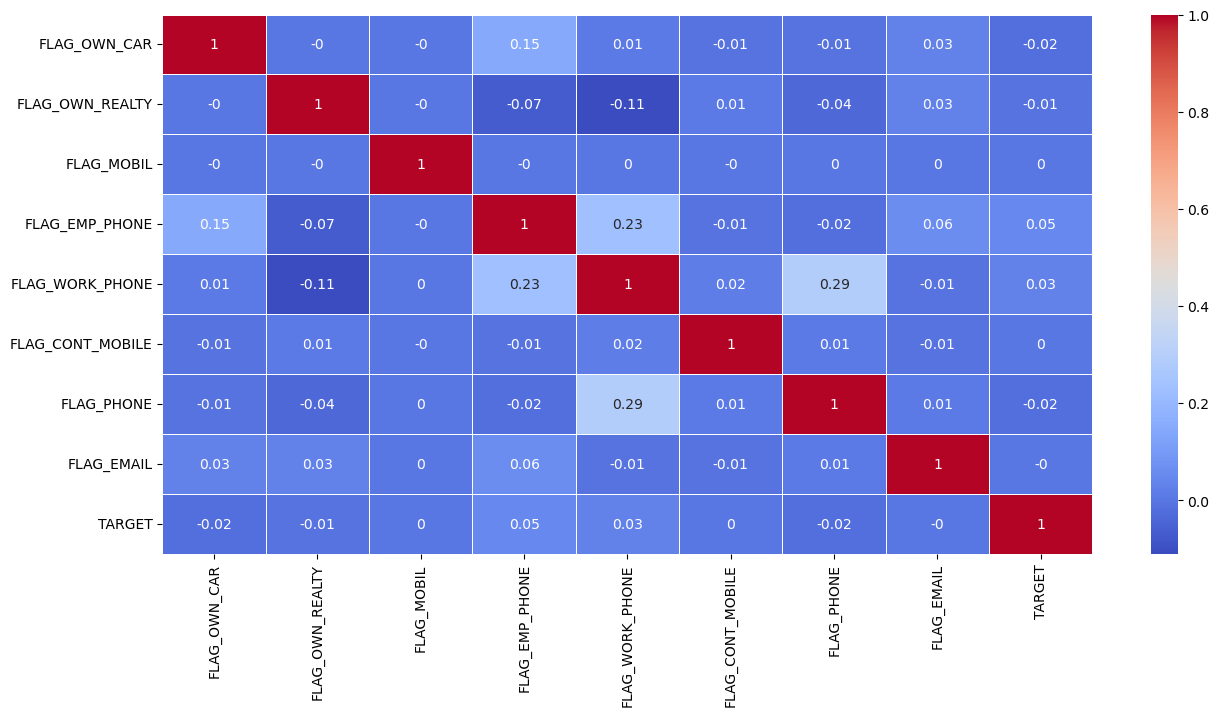

In [16]:

corr_df = round(flag_corr_df.corr(numeric_only = True),2)

plt.figure(figsize=(15,7))
sns.heatmap(corr_df, cmap='coolwarm', linewidths=.5, annot=True)

In [17]:
app_flag_rmvd = new_app.drop(labels= flag_col, axis=1)
app_flag_rmvd.shape

(307511, 45)

In [18]:
app_flag_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
app_flag_rmvd.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
   

<AxesSubplot: >

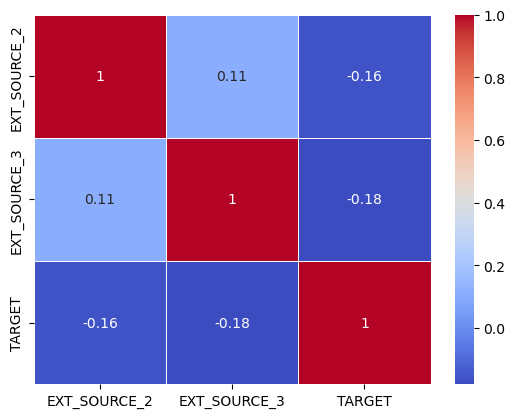

In [20]:
exit_score = app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]
exit_score_corr = round(exit_score.corr(numeric_only=True),2)

sns.heatmap(data=exit_score_corr, cmap='coolwarm', linewidths=.5, annot=True)

In [21]:
app_score_rmvd = app_flag_rmvd.drop(labels=['EXT_SOURCE_2','EXT_SOURCE_3'], axis=1)
app_score_rmvd.shape

(307511, 43)

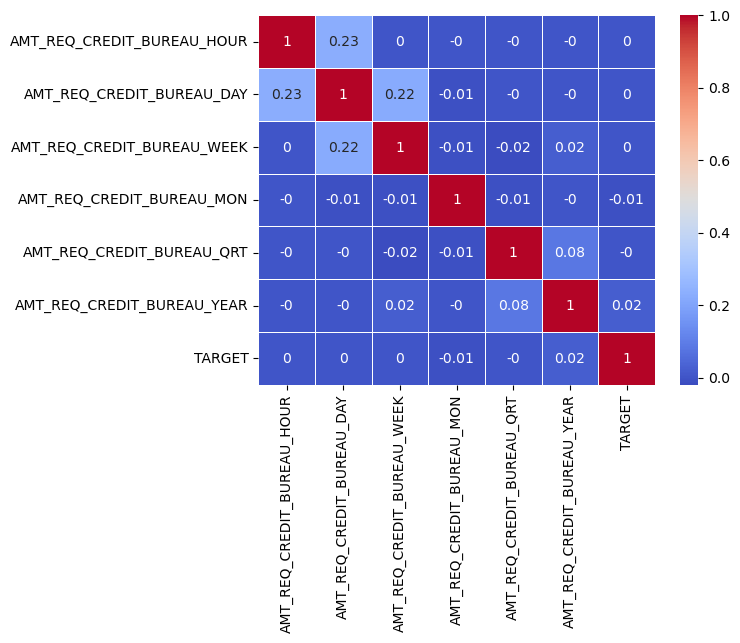

In [22]:
amount_req = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']
amount_req = app_score_rmvd[amount_req]
amount_req_corr = round(amount_req.corr(numeric_only=True), 2)

sns.heatmap(data= amount_req_corr, cmap='coolwarm', linewidths=.5, annot=True);

In [23]:
amount_req_rmv = app_score_rmvd.drop(labels=amount_req, axis=1)
amount_req_rmv.shape

(307511, 36)

In [24]:
amount_req_rmv.isnull().sum()/amount_req_rmv.shape[0] *100

SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

# Feature Engineering

In [25]:
app_score_rmvd.isnull().sum().sort_values()/app_score_rmvd.shape[0] * 100

SK_ID_CURR                      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_RATING_CLIENT            0.000000
NAME_HOUSING_TYPE               0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
REGION_POPULATION_RELATIVE      0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
CODE_GENDER                     0.000000
NAME_INCOME_TYPE

## Missing Imputation

In [26]:
app_score_rmvd['CNT_FAM_MEMBERS'] = app_score_rmvd['CNT_FAM_MEMBERS'].fillna(app_score_rmvd['CNT_FAM_MEMBERS'].mode()[0]) 

In [27]:
app_score_rmvd['CNT_FAM_MEMBERS'].isnull().sum()

0

In [28]:
app_score_rmvd['OCCUPATION_TYPE'] = app_score_rmvd['OCCUPATION_TYPE'].fillna(app_score_rmvd['OCCUPATION_TYPE'].mode()[0])
app_score_rmvd['OCCUPATION_TYPE'].isnull().sum()

0

In [29]:
app_score_rmvd['NAME_TYPE_SUITE'] = app_score_rmvd['NAME_TYPE_SUITE'].fillna(app_score_rmvd['NAME_TYPE_SUITE'].mode()[0])
app_score_rmvd['NAME_TYPE_SUITE'].isnull().sum()
#app_score_rmvd.groupby(['NAME_TYPE_SUITE']).size()

0

In [30]:
app_score_rmvd['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [31]:
app_score_rmvd['AMT_ANNUITY'] = app_score_rmvd['AMT_ANNUITY'].fillna(app_score_rmvd['AMT_ANNUITY'].mean())
app_score_rmvd['AMT_ANNUITY'].isnull().sum()

0

In [32]:
app_score_rmvd['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [33]:
app_score_rmvd['AMT_REQ_CREDIT_BUREAU_WEEK'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  8.,  7.])

In [34]:
amt_req_col = []

for col in app_score_rmvd:
    if col.startswith("AMT_REQ_CREDIT_BUREAU_"):
        amt_req_col.append(col)
        
amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [35]:
for col in amt_req_col:
    app_score_rmvd[col] = app_score_rmvd[col].fillna(app_score_rmvd[col].median())

In [36]:
app_score_rmvd.isnull().sum().sort_values()/ app_score_rmvd.shape[0] *100

SK_ID_CURR                     0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
AMT_REQ_CREDIT_BUREAU_HOUR     0.000000
AMT_REQ_CREDIT_BUREAU_DAY      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
CNT_FAM_MEMBERS                0.000000
OCCUPATION_TYPE                0.000000
REGION_RATING_CLIENT           0.000000
DAYS_REGISTRATION              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000


In [37]:
app_score_rmvd['AMT_GOODS_PRICE'].isnull().sum()

278

In [38]:
app_score_rmvd['AMT_GOODS_PRICE'].agg(['min', 'max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [39]:
app_score_rmvd['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [40]:
app_score_rmvd['AMT_GOODS_PRICE'].unique()

array([ 351000. , 1129500. ,  135000. , ...,  453465. ,  143977.5,
        743863.5])

In [41]:
app_score_rmvd['AMT_GOODS_PRICE'] = app_score_rmvd['AMT_GOODS_PRICE'].fillna(app_score_rmvd['AMT_GOODS_PRICE'].median())
app_score_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [42]:
app_score_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


## Value Modification

In [43]:
days_col = []

for col in app_score_rmvd:
    if col.startswith("DAYS"):
        days_col.append(col)
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [44]:
app_score_rmvd[days_col].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0


In [45]:
for col in days_col:
    app_score_rmvd[col] = abs(app_score_rmvd[col])

app_score_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
app_score_rmvd.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

In [47]:
app_score_rmvd['OBS_60_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  21.,  15.,  22.,  16.,  20.,  25.,
        17.,  19.,  18.,  24.,  23.,  28.,  29.,  27.,  47., 344.,  30.,
        26.])

## Outlier Detection & Treatment

AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2548
DAYS_LAST_PHONE_CHANGE           3773
AMT_CREDIT                       5603
DAYS_ID_PUBLISH                  6168
DAYS_EMPLOYED                   12574
AMT_ANNUITY                     13673
DAYS_REGISTRATION               15688
DAYS_BIRTH                      17460
SK_ID_CURR                     307511

In [48]:
app_score_rmvd['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

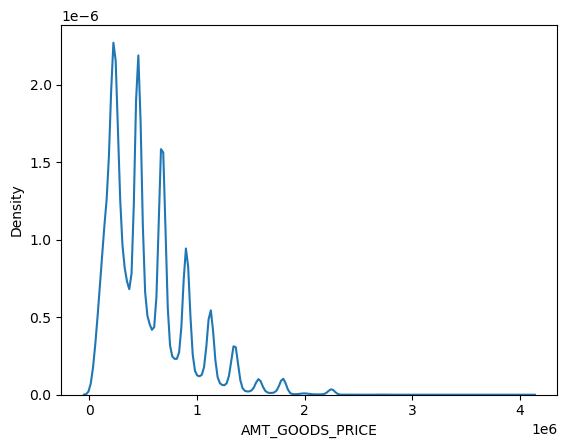

In [49]:
sns.kdeplot(data=app_score_rmvd, x='AMT_GOODS_PRICE')

<AxesSubplot: xlabel='AMT_GOODS_PRICE'>

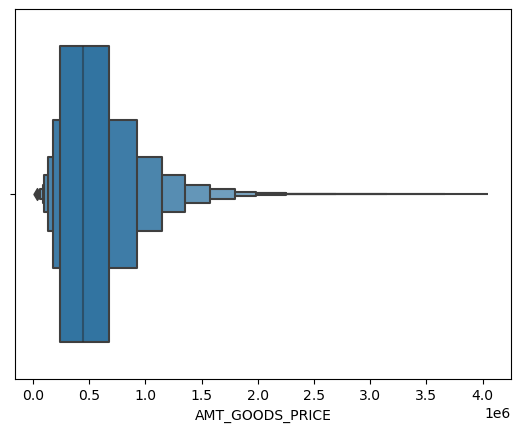

In [50]:
sns.boxenplot(data=app_score_rmvd, x='AMT_GOODS_PRICE')

## Binning

In [51]:
app_score_rmvd['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [52]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100K-200k','200K-300k','300K-400k','400K-500k','500K-600k',
          '600K-700k','700K-800k','800K-900k','Above 900K']

app_score_rmvd['AMT_GOODS_PRICE_RANGE'] = pd.cut(app_score_rmvd['AMT_GOODS_PRICE'],bins,labels=ranges)

In [53]:
app_score_rmvd.groupby(['AMT_GOODS_PRICE']).size()

AMT_GOODS_PRICE
40500.0         1
45000.0      1169
49500.0       157
50751.0         1
54000.0       290
             ... 
3555000.0       1
3600000.0       3
3712500.0       1
3825000.0       1
4050000.0       8
Length: 1002, dtype: int64

In [54]:
app_score_rmvd['AMT_INCOME_TOTAL'].agg(['min','max','median'])

min           25650.0
max       117000000.0
median       147150.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [55]:
app_score_rmvd['AMT_INCOME_TOTAL'].mean()

168797.9192969845

In [56]:
app_score_rmvd['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [57]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150k','150K-200k','200K-250k','250K-300k','300K-350k',
          '350K-400k','Above 400K']

app_score_rmvd['AMT_INCOME_TOTAL_RANGE'] = pd.cut(app_score_rmvd['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [58]:
app_score_rmvd.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0-100K        63698
100K-150k     91591
150K-200k     64307
200K-250k     48137
250K-300k     17039
300K-350k      8874
350K-400k      5802
Above 400K     8063
dtype: int64

In [59]:
app_score_rmvd['AMT_INCOME_TOTAL_RANGE'].isnull().sum()

0

In [60]:
app_score_rmvd['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [61]:
app_score_rmvd['AMT_CREDIT'].max()

4050000.0

In [62]:
bins = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M',
          '1M-2M','2M-3M','Above 3M']

app_score_rmvd['AMT_CREDIT_RANGE'] = pd.cut(app_score_rmvd['AMT_CREDIT'],bins,labels=ranges)

In [63]:
app_score_rmvd.groupby(['AMT_CREDIT_RANGE']).size()

AMT_CREDIT_RANGE
0-200K       36144
200K-400K    81151
400K-600K    66270
600K-800K    43242
800K-900K    21792
900K-1M       8927
1M-2M        47956
2M-3M         1997
Above 3M        32
dtype: int64

In [64]:
app_score_rmvd['AMT_CREDIT'].isnull().sum()

0

In [65]:
app_score_rmvd['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [66]:
app_score_rmvd['AMT_ANNUITY'].max()

258025.5

In [67]:
bins = [0,25000,50000,75000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-75K','75K-100K','100K-150K','150K-200K','Above 200K']

app_score_rmvd['AMT_ANNUITY_RANGE'] = pd.cut(app_score_rmvd['AMT_ANNUITY'],bins,labels=ranges)

In [68]:
app_score_rmvd.groupby(['AMT_ANNUITY_RANGE']).size()

AMT_ANNUITY_RANGE
0-25K         154867
25K-50K       131347
50K-75K        19321
75K-100K        1471
100K-150K        437
150K-200K         32
Above 200K        36
dtype: int64

In [69]:
app_score_rmvd['AMT_ANNUITY_RANGE'].isnull().sum()

0

In [70]:
app_score_rmvd['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [71]:
app_score_rmvd['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,
                                              0.85,0.9,0.95,0.99])

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.81     10913.1
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [72]:
app_score_rmvd[app_score_rmvd['DAYS_EMPLOYED'] < 
                   app_score_rmvd['DAYS_EMPLOYED'].max()].max()['DAYS_EMPLOYED']

17912

In [73]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]

ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'50Y-65Y','Above 65Y']

app_score_rmvd['DAYS_EMPLOYED_RANGE'] = pd.cut(app_score_rmvd['DAYS_EMPLOYED'],bins,labels=ranges)


In [74]:
app_score_rmvd.groupby(['DAYS_EMPLOYED_RANGE']).size()

DAYS_EMPLOYED_RANGE
0-5Y         136309
5Y-10Y        64872
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
50Y-65Y           0
Above 65Y     55374
dtype: int64

In [75]:
app_score_rmvd['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.81    20641.0
0.85    21316.0
0.90    22181.0
0.95    23204.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [76]:
app_score_rmvd['DAYS_BIRTH'].min()

7489

In [77]:
bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

app_score_rmvd['DAYS_BIRTH_RANGE'] = pd.cut(app_score_rmvd['DAYS_BIRTH'],bins,labels=ranges)


In [78]:
app_score_rmvd.groupby(['DAYS_BIRTH_RANGE']).size()

DAYS_BIRTH_RANGE
20Y              0
20Y-30Y      45021
30Y-40Y      82308
40Y-50Y      76541
50Y-60Y      68062
Above 60Y    35579
dtype: int64

In [79]:
app_score_rmvd['DAYS_BIRTH'].isnull().sum()

0

## Data Analysis

In [80]:
app_score_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [81]:
obj_vars = app_score_rmvd.select_dtypes(include=['object']).columns
obj_vars

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

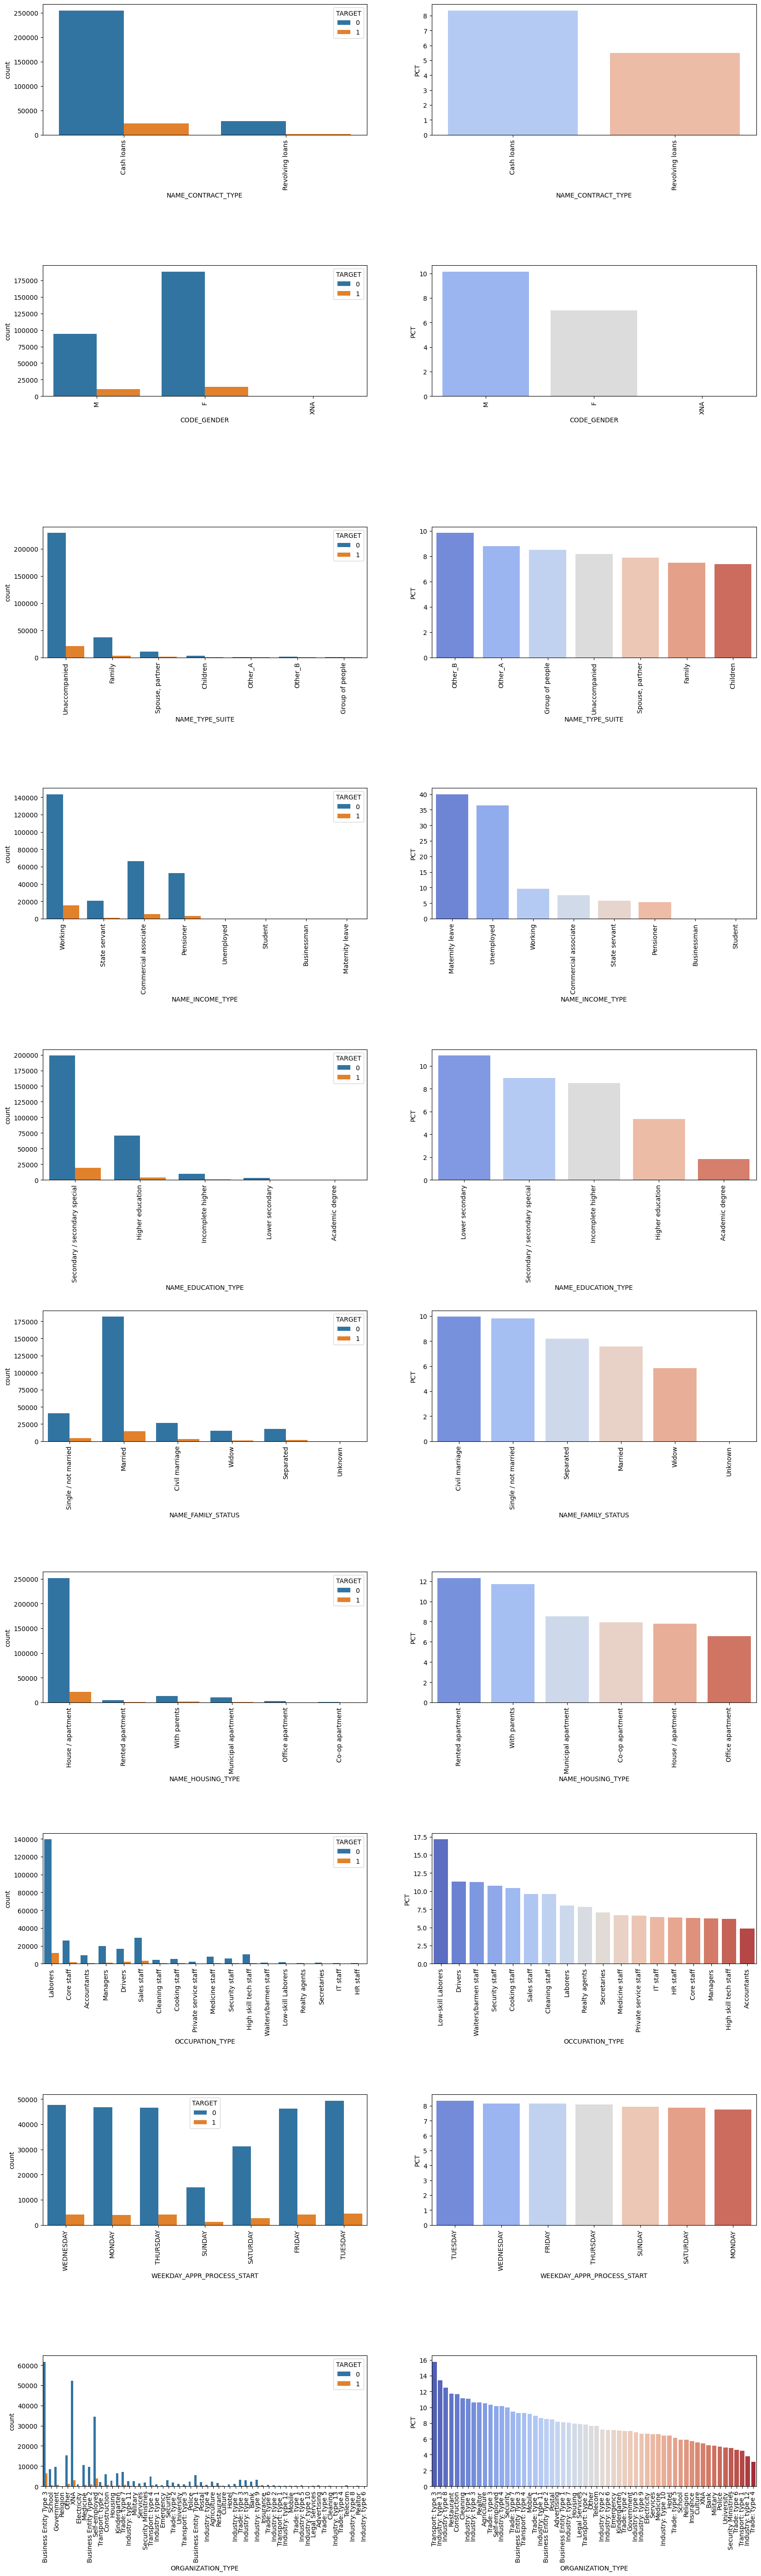

In [82]:
plt.figure(figsize=(20,70))


for i, var in enumerate(obj_vars):

    data_pct = app_score_rmvd[[var,'TARGET']].groupby([var], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_pct['PCT'] = data_pct['TARGET']*100


    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.2,hspace=1)
    sns.countplot(data=app_score_rmvd,x=var,hue='TARGET')
    plt.xticks(rotation=90)

    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
    plt.xticks(rotation=90)

## Numerical Values

In [83]:
app_score_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [84]:
num_cat_data = app_score_rmvd.select_dtypes(include=['float64', 'int64','category'])
num_data = app_score_rmvd.select_dtypes(include=['float64', 'int64'])
num_cat_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,0.0,0.0,0.0,1.0,300K-400k,200K-250k,400K-600K,0-25K,0-5Y,20Y-30Y
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,0.0,0.0,0.0,Above 900K,250K-300k,1M-2M,25K-50K,0-5Y,40Y-50Y
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,0.0,100K-200k,0-100K,0-200K,0-25K,0-5Y,50Y-60Y
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,0.0,0.0,1.0,200K-300k,100K-150k,200K-400K,25K-50K,5Y-10Y,50Y-60Y
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,0.0,500K-600k,100K-150k,400K-600K,0-25K,5Y-10Y,50Y-60Y


In [85]:
num_data.groupby(['TARGET']).size()/ num_data.shape[0]*100

TARGET
0    91.927118
1     8.072882
dtype: float64

In [86]:
num_defaulters = num_data[num_data['TARGET']==1].drop(['TARGET'],axis=1)
num_defaulters.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,0,112500.0,979992.0,27076.5,702000.0,0.018029,18724,2628,6573.0,...,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,...,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,45.0,...,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,0,81000.0,252000.0,14593.5,252000.0,0.028663,24794,365243,5391.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
num_non_defaulters = num_data[num_data['TARGET']==0].drop(['TARGET'],axis=1)
num_non_defaulters.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,...,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0


### Defaulters

In [88]:
defaulters_corr = num_defaulters.corr()
defaulters_corr_unstack = defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1',
                                                                                                               'level_1':'var2',
                                                                                                               0:'corr'})
defaulters_corr_unstack['corr'] = abs(defaulters_corr_unstack['corr'])
defaulters_corr_unstack = defaulters_corr_unstack.dropna(subset=['corr'])

defaulters_corr_unstack = defaulters_corr_unstack.sort_values(by= ['corr'], ascending=False)
defaulters_corr_unstack.head(10)

,var1,var2,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
163,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
131,AMT_ANNUITY,AMT_CREDIT,0.752195
263,DAYS_EMPLOYED,DAYS_BIRTH,0.582185


### Non-Defaulters

In [89]:
nn_def_corr = num_non_defaulters.corr()
nn_def_corr_unstack = nn_def_corr.where(np.triu(np.ones(nn_def_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1',
                                                                                                               'level_1':'var2',
                                                                                                               0:'corr'})
nn_def_corr_unstack['corr'] = abs(nn_def_corr_unstack['corr'])
nn_def_corr_unstack = nn_def_corr_unstack.dropna(subset=['corr'])

nn_def_corr_unstack = nn_def_corr_unstack.sort_values(by= ['corr'], ascending=False)
nn_def_corr_unstack.head(10)

,var1,var2,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
163,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
131,AMT_ANNUITY,AMT_CREDIT,0.771297
263,DAYS_EMPLOYED,DAYS_BIRTH,0.626114


### Univariate Numeric Variable Analysis

In [90]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
amt_var = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']


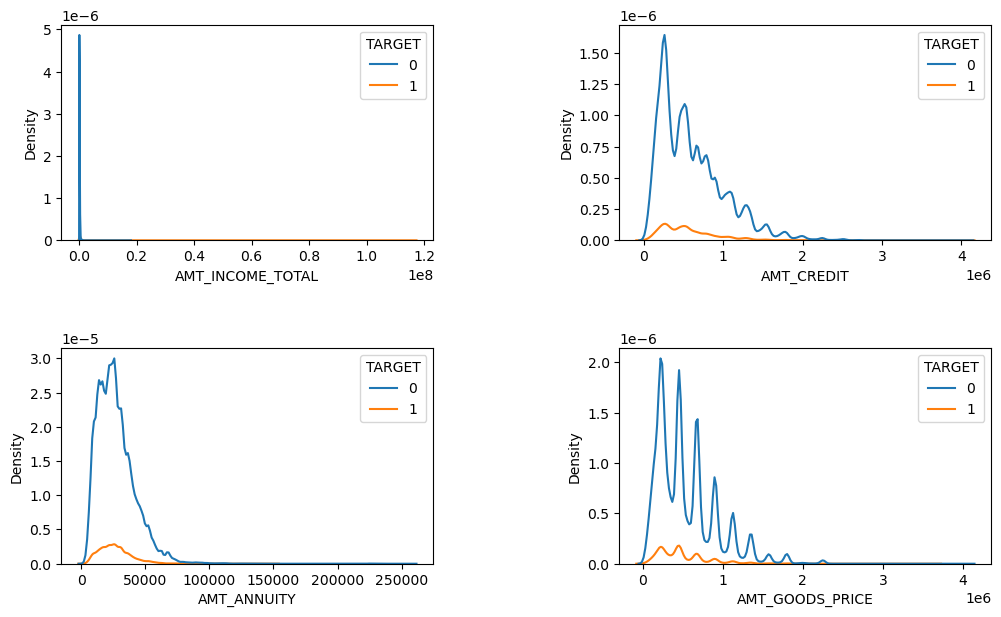

In [92]:
plt.figure(figsize=(12,7))

for i, col in enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data, x=col, hue='TARGET')
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

### Bivariates Numeric Variable Analysis

In [93]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


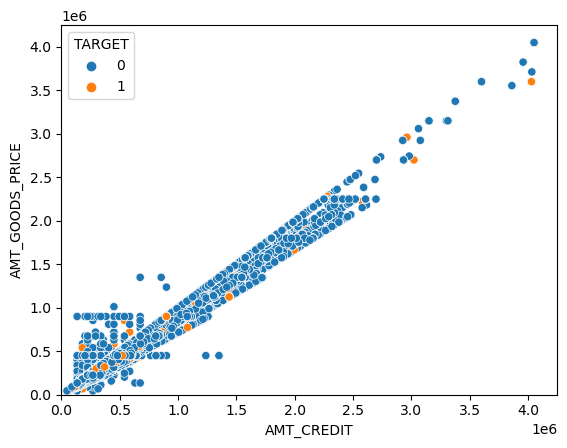

In [94]:
sns.scatterplot(data=num_data, x='AMT_CREDIT', y='AMT_GOODS_PRICE', hue='TARGET')
plt.xlim(0)
plt.ylim(0);

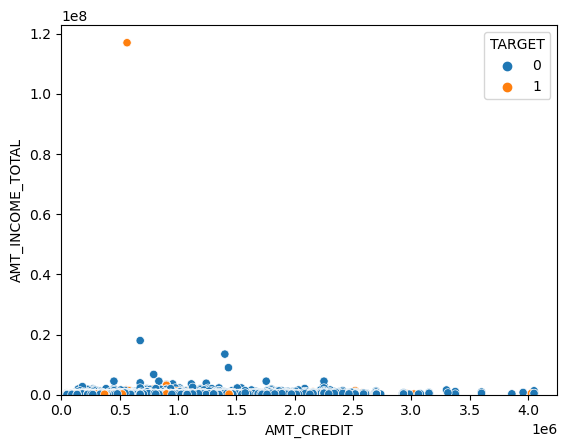

In [95]:
sns.scatterplot(data=num_data, x='AMT_CREDIT', y='AMT_INCOME_TOTAL', hue='TARGET')
plt.xlim(0)
plt.ylim(0);

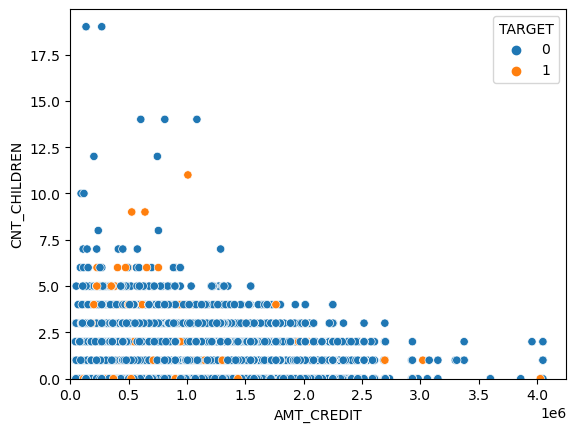

In [96]:
sns.scatterplot(data=num_data, x='AMT_CREDIT', y='CNT_CHILDREN', hue='TARGET')
plt.xlim(0)
plt.ylim(0);

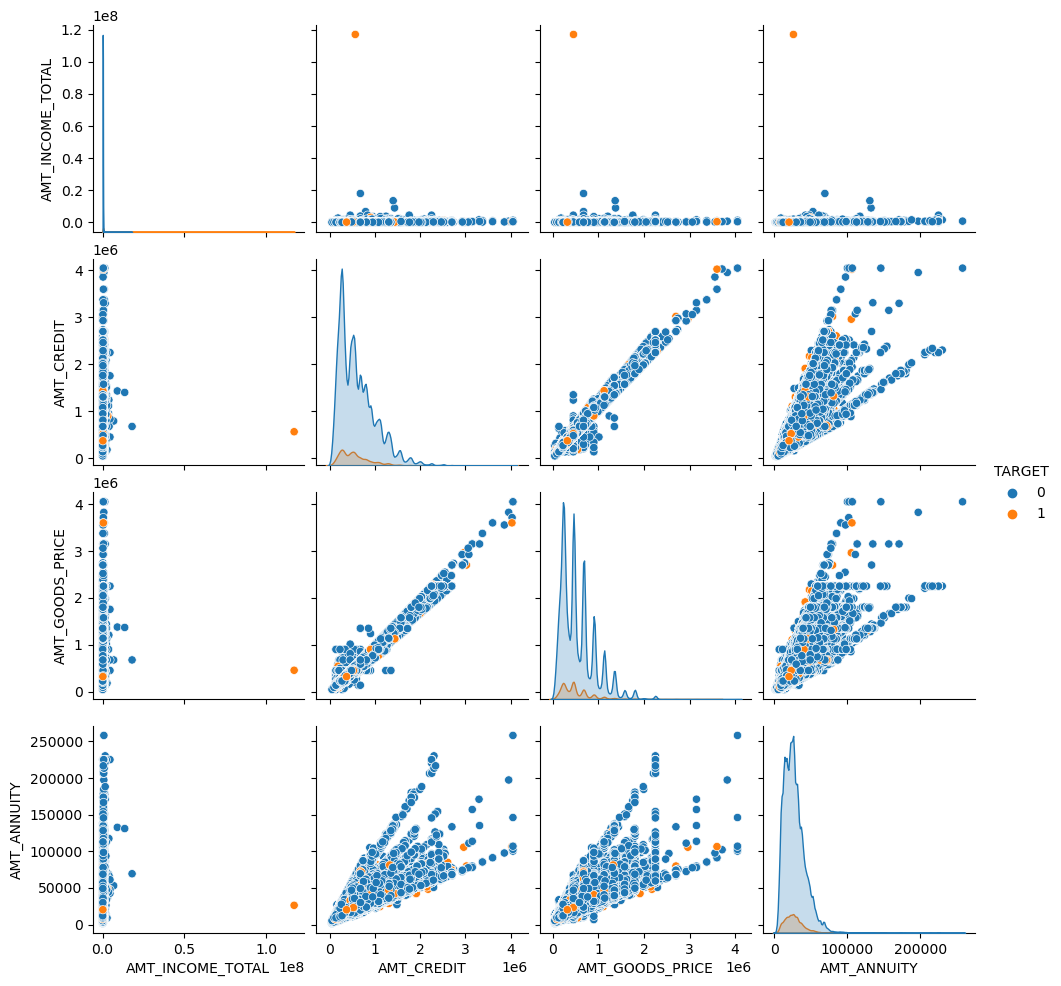

In [97]:
amt_var = num_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','TARGET']]

sns.pairplot(data=amt_var,hue='TARGET');

In [98]:
num_data['DAYS_BIRTH'].min()/365

20.517808219178082

In [99]:
20000/365

54.794520547945204

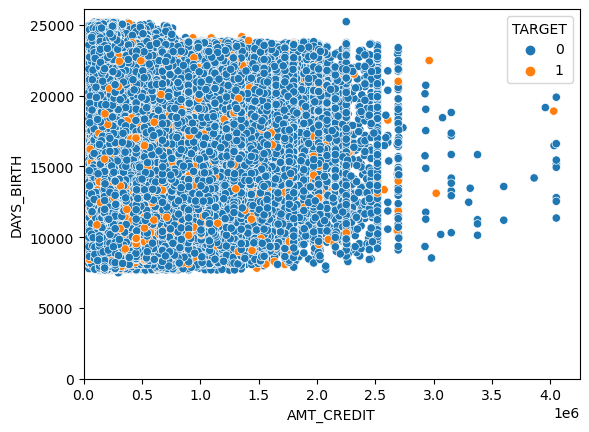

In [100]:
sns.scatterplot(data=num_data, x='AMT_CREDIT', y='DAYS_BIRTH', hue='TARGET')
plt.xlim(0)
plt.ylim(0);

In [101]:
7500/365

20.54794520547945

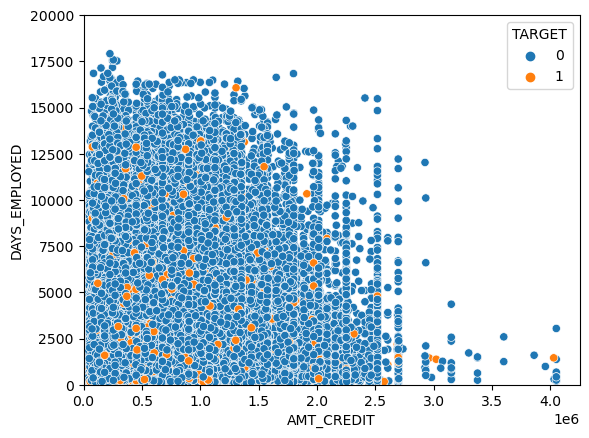

In [102]:
sns.scatterplot(data=num_data, x='AMT_CREDIT', y='DAYS_EMPLOYED', hue='TARGET')
plt.xlim(0)
plt.ylim(0,20000);

## Previous Data

In [103]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [105]:
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100).reset_index().rename(columns={'index':'var',
                                                                                                                                   0:'count_pct'})

null_count.head(15)

,var,count_pct
0,RATE_INTEREST_PRIVILEGED,99.643698
1,RATE_INTEREST_PRIMARY,99.643698
2,AMT_DOWN_PAYMENT,53.636480
3,RATE_DOWN_PAYMENT,53.636480
4,NAME_TYPE_SUITE,49.119754
5,NFLAG_INSURED_ON_APPROVAL,40.298129
6,DAYS_TERMINATION,40.298129
7,DAYS_LAST_DUE,40.298129
8,DAYS_LAST_DUE_1ST_VERSION,40.298129
9,DAYS_FIRST_DUE,40.298129


In [106]:
var_msng_ge_40 = list(null_count[null_count['count_pct']>=40]['var'])
var_msng_ge_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [107]:
nva_cols = var_msng_ge_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
                           'NFLAG_INSURED_ON_APPROVAL']
nva_cols

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_INSURED_ON_APPROVAL']

In [108]:
len(nva_cols)

15

In [109]:
new_prev_app = prev_app.drop(nva_cols, axis=1)
new_prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,1,XAP,Approved,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,1,XNA,Approved,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,1,XNA,Approved,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,1,XNA,Approved,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,1,Repairs,Refused,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [110]:
new_prev_app.isnull().sum().sort_values(ascending=False)/new_prev_app.shape[0]*100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_CLIENT_TYPE           0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
NAME_GOODS_CATEGORY        0.000000
SK_ID_PREV                 0.000000
CODE_REJECT_REASON         0.000000
SK_ID_CURR                 0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
NFLAG_LAST_APPL_IN_DAY     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
NAME_PAYMENT_TYPE          0.000000
dtype: float64

In [111]:
new_prev_app['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [112]:
new_prev_app['AMT_GOODS_PRICE_MEDIAN'] = new_prev_app['AMT_GOODS_PRICE'].fillna(new_prev_app['AMT_GOODS_PRICE'].median())

new_prev_app['AMT_GOODS_PRICE_MEAN'] = new_prev_app['AMT_GOODS_PRICE'].fillna(new_prev_app['AMT_GOODS_PRICE'].mean())

new_prev_app['AMT_GOODS_PRICE_MODE'] = new_prev_app['AMT_GOODS_PRICE'].fillna(new_prev_app['AMT_GOODS_PRICE'].mode())

new_prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,...,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_GOODS_PRICE_MEDIAN,AMT_GOODS_PRICE_MEAN,AMT_GOODS_PRICE_MODE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,1,XAP,Approved,...,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,17145.0,17145.0,17145.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,1,XNA,Approved,...,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,607500.0,607500.0,607500.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,1,XNA,Approved,...,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,112500.0,112500.0,112500.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,1,XNA,Approved,...,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,450000.0,450000.0,450000.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,1,Repairs,Refused,...,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,337500.0,337500.0,337500.0


In [113]:
gp_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

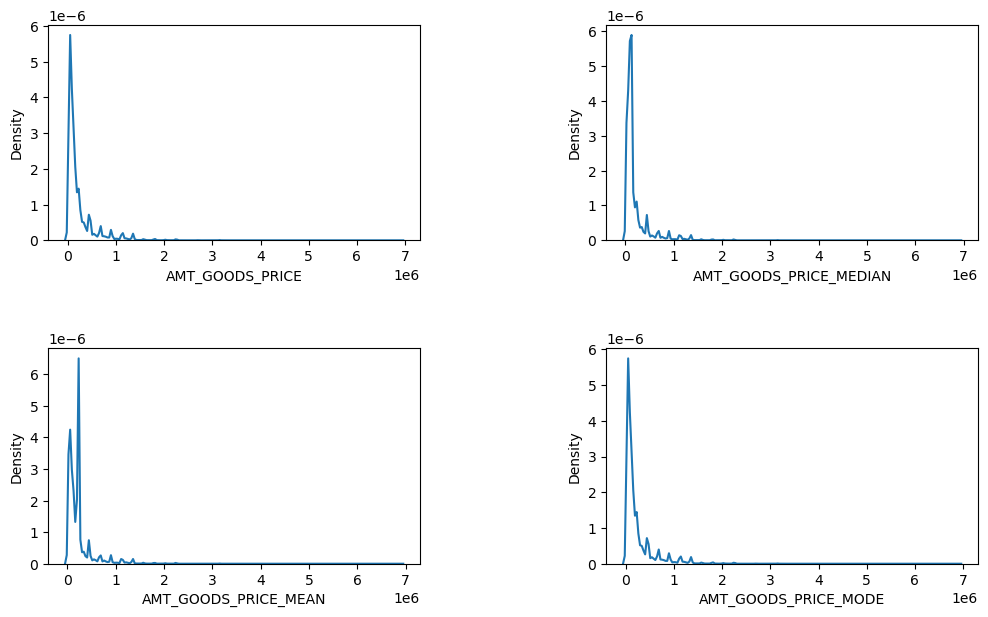

In [114]:
plt.figure(figsize=(12,7))

for i, col in enumerate(gp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=new_prev_app, x=col)
    plt.subplots_adjust(wspace=.5, hspace=.5)

In [115]:
new_prev_app['AMT_GOODS_PRICE'] = new_prev_app['AMT_GOODS_PRICE'].fillna(new_prev_app['AMT_GOODS_PRICE'].median())

In [116]:
new_prev_app['AMT_GOODS_PRICE'].isnull().sum()

0

In [117]:
new_prev_app.drop(columns=['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'],inplace=True)

In [118]:
new_prev_app['AMT_ANNUITY'].agg(func=['mean','median','max'])

mean       15955.120659
median     11250.000000
max       418058.145000
Name: AMT_ANNUITY, dtype: float64

In [119]:
new_prev_app['AMT_ANNUITY'] = new_prev_app['AMT_ANNUITY'].fillna(new_prev_app['AMT_ANNUITY'].median())
new_prev_app['AMT_ANNUITY'].isnull().sum()

0

In [120]:
new_prev_app['CNT_PAYMENT'].agg(func=['mean','median','max'])

mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

In [121]:
new_prev_app[new_prev_app['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)


NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [122]:
new_prev_app['CNT_PAYMENT'] = new_prev_app['CNT_PAYMENT'].fillna(0)
new_prev_app['CNT_PAYMENT'].isnull().sum()

0

In [123]:
new_prev_app['PRODUCT_COMBINATION'] = new_prev_app['PRODUCT_COMBINATION'].fillna(new_prev_app['PRODUCT_COMBINATION'].mode()[0])
new_prev_app['PRODUCT_COMBINATION'].isnull().sum()

0

In [124]:
new_prev_app.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
CODE_REJECT_REASON        0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_GOODS_CATEGORY       0
NAME_CLIENT_TYPE          0
NAME_PAYMENT_TYPE         0
SK_ID_CURR                0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
NFLAG_LAST_APPL_IN_DAY    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
PRODUCT_COMBINATION       0
dtype: int64

## Univariate and Bivariate Analysis on Merged Current & Previous Data

In [125]:
merged_df = pd.merge(app_score_rmvd, new_prev_app, how='inner',on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [126]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BURE

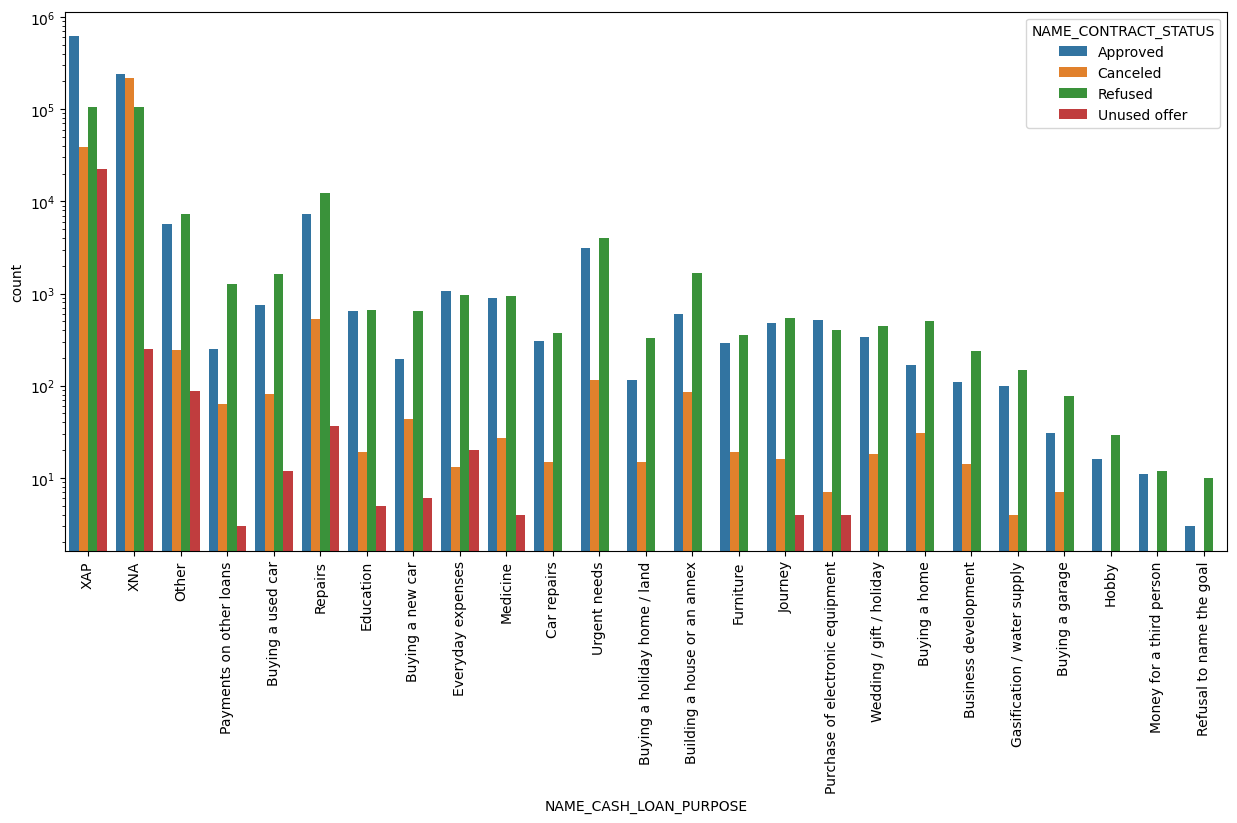

In [127]:
plt.figure(figsize=(15,7))

sns.countplot(data=merged_df, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')

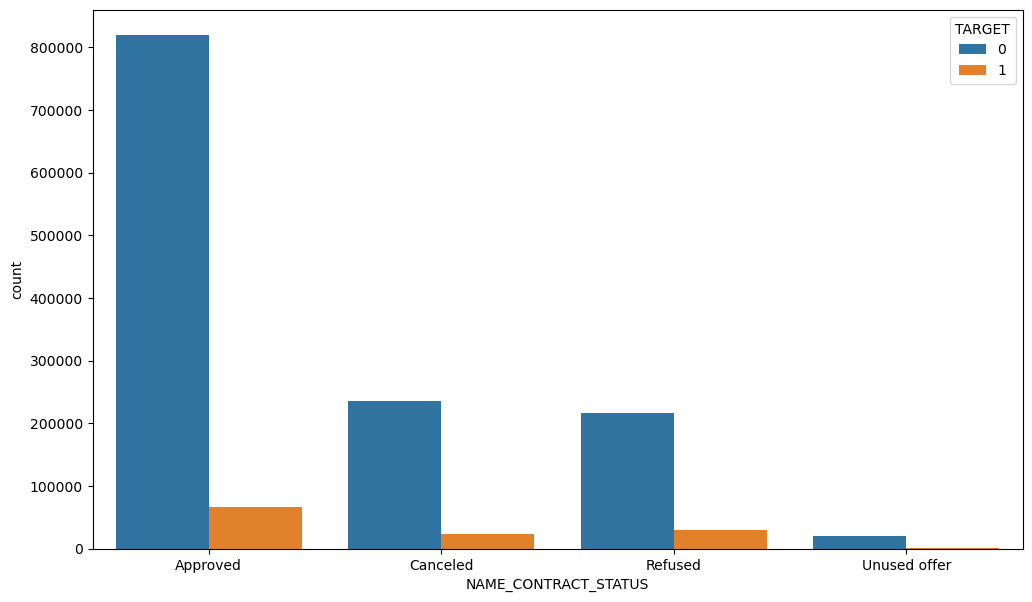

In [128]:
plt.figure(figsize=(12,7))

sns.countplot(data=merged_df, x='NAME_CONTRACT_STATUS', hue='TARGET');


In [129]:
merged_agg = merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_df = merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()

merged_agg2 = pd.merge(merged_agg, sum_df, how='left',on='NAME_CONTRACT_STATUS')
merged_agg2['pct'] = round(merged_agg2['counts_x']/merged_agg2['counts_y']*100,2)
merged_agg2

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.41
1,Approved,1,67243,886099,7.59
2,Canceled,0,235641,259441,90.83
3,Canceled,1,23800,259441,9.17
4,Refused,0,215952,245390,88.00
5,Refused,1,29438,245390,12.00
6,Unused offer,0,20892,22771,91.75
7,Unused offer,1,1879,22771,8.25


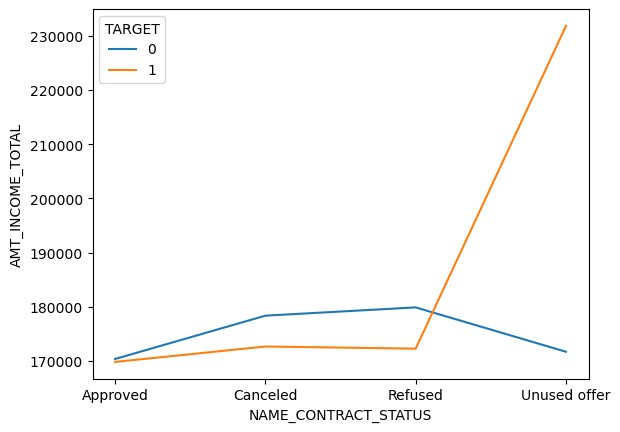

In [130]:
sns.lineplot(data=merged_df, x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',errorbar=None,hue='TARGET');

## Conclusion & Insights

**NAME_CONTRACT_TYPE:**
> - Most of the customers took cash loans.
> - Customers who took cash loans are less likely to default.

**CODE_GENDER:**
> - Women are about 2X more likely to take loans than men.
> - Men are more likely (10.14%) default on loans than women (7.0%). So, women are safer bet than men.

**NAME_TYPE_SUITE:**
> - 81.24% of people who applied for loans weren't accompanied by anyone,followed by those who were accompanied by a family member 13%, and by spouse/partner.

> - Those who were not accompanied by anyone to take loans are more likely default followed by those who were accompanied by a spouse/partner, and family member. However, it will be more profitable to target those who were not accompanied by anyone spouse/partner, then family member.

**NAME_INCOME_TYPE:**
> - Those who are working are more likely to take on loans follows by commercial associates, pensioner, state servants.

> - Those are working, commercial associtae, state servant and pensioner have less than 10% default rate.

**NAME_EDUCATION_TYPE:**
> - Majority of those who took loans have secondary/secondary special education, followed by higher education.

> - Those with higher education and secondary/secondary special education have 6% - 8.5% default rate.

**NAME_FAMILY_STATUS:**
> - Married people are more likely to get loans followed by single/not married, and civil marriage.

> - Married people are safer bet with < 8% default rate followed by single, then civil marriage with < 10% default rate each. 

**NAME_HOUSING_TYPE:**
> - It is way safer and more profitable to give loans to those who have House/Apartment. They take more than 70% of total loans and have < 8% default rate.

**OCCUPATION_TYPE:**
> - Low-Skill Laboreres and drivers are the highest defaulters.
    Accountants are the lowest defaulters
    Core staff, Managers and Laborers are safer to target with a default rate of <= 7.5 to 10%

**ORGANIZATION_TYPE:**
> - Transport type 3 are the highest defaulter.
> - Others, Business Entity Type 3, Self Employed are good to go with default rate around 10 % each.


**<p style="text-align: center;">=============Univariate Numeric Variable Analysis=============</p>**


> - Most of the loans were given for the good price ranging between 0 to 1 million dollar.

> - Most the loans were given for the credit amount ranging between 0 to 1 million dollar.

> - Most of the customers were paying between 0 to 50K dollar amount in annuity.

> - Most of the customers have income between 0 to 1 million dollar. 



**<p style="text-align: center;">==============Bivariate Numeric Variable Analysis=============</p>**

> - AMT_CREDIT and AMT_GOODS_PRICE are linearly correlated. The number of defaulter decerease when AMT_CREDIT increases.

> - AMT_CREDIT and AMT_INCOME_TOTAL
People who have income of 1 million or less are more likely to take loans; from which those who took loan of 1.5 million or less have higher chance of becoming defaulters.

> - We can target those who have income less than 1 million and are taking loans more than 1.5 millions.s

> - AMT_CREDIT and CNT_CHILDREN
It's safer to give loans to those who have 1 to 3 kids.

> - AMT_CREDIT and DAYS_BIRTH
The minimum age among those who took loans is 20.5 years. There are less defaulters among the people who took out 2 million or more credits. Also, it's safer to give loans to those who are 55 years or older.

> - AMT_CREDIT and DAYS_EMPLOYED
All those who took 1.5 or morle credit are less likely to default. Also, those worked for 21 years or more are safer bet.

> - AMT_CREDIT and AMT_ANNUITY
People who can pay the annuity of 100K or more are more likely to get the loan and that is up to 2 million and are also in the safer segment.


**<p style="text-align: center;">==============Analysis on Merged Data=============</p>**

> - Repair purpose has the most number of applicant among the previous applications, it also has the heighest number of cancellations.

> - Offers which were unused previously now have the most number of defaulters despite the borrowers having higher income than the rest.

> -  Most of the applicatons. which were previously either canceled or refused about 85-90% of them are repayer in the current data.

### Recomendations:

> - To give more cash loans as they are safer and more profitable.
> - To give more or prioratize giving loans to Female/Women as they are about 2X more likely
        to take loans than men are less likely to default than men
        
> - About 85-90% of the customers which were previously canceled or refused are repayer in the current data. Bank can do the analysis and can consider to give loan to these segments.

### Precautions:

> - Be more cautious about giving any types of loans beside cash loans
> - Be more cautious about giving loans to men
> - org. Transport type 3 should be avoided
> - Low-Skill Laboreres and drivers  should be avoided
> - Offers previously unused and high income customer should be avoided.